# Prédiction d'éligibilité pour un crédit chez une Banque

In [209]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Lecture des données
df = pd.read_csv('data/loan-data-673b233f1c1cb921157550.csv')

# Affichage des premières lignes et informations sur le dataset
print("Aperçu des données :")
display(df.head())
print("\nInformations sur le dataset :")
display(df.info())

Aperçu des données :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


None

## Explorations des données

Statistiques descriptives :


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000



Valeurs manquantes par colonne :


,Valeurs manquantes,Pourcentage
Loan_ID,0,0.000000
Gender,24,2.446483
Married,3,0.305810
Dependents,25,2.548420
Education,0,0.000000
Self_Employed,55,5.606524
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,27,2.752294
Loan_Amount_Term,20,2.038736


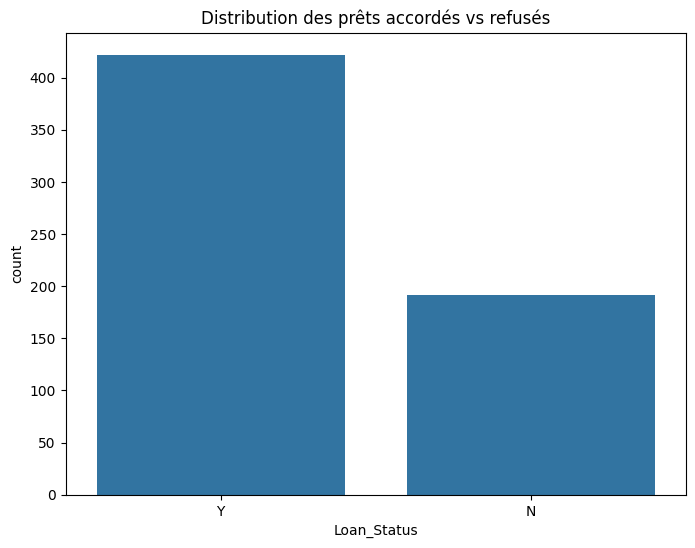

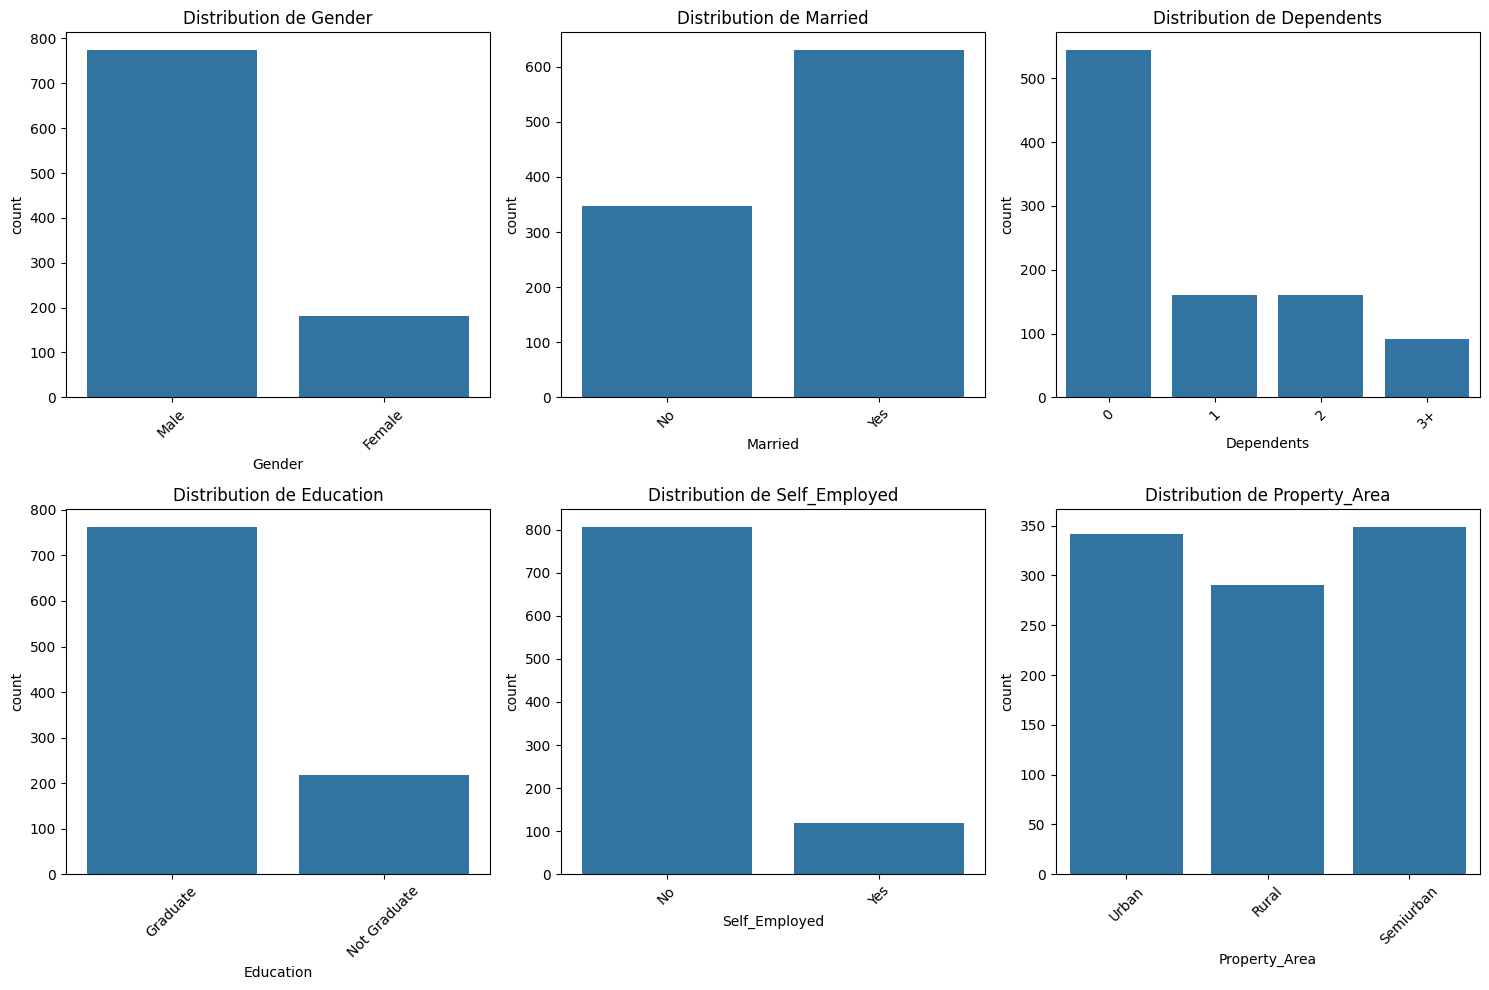

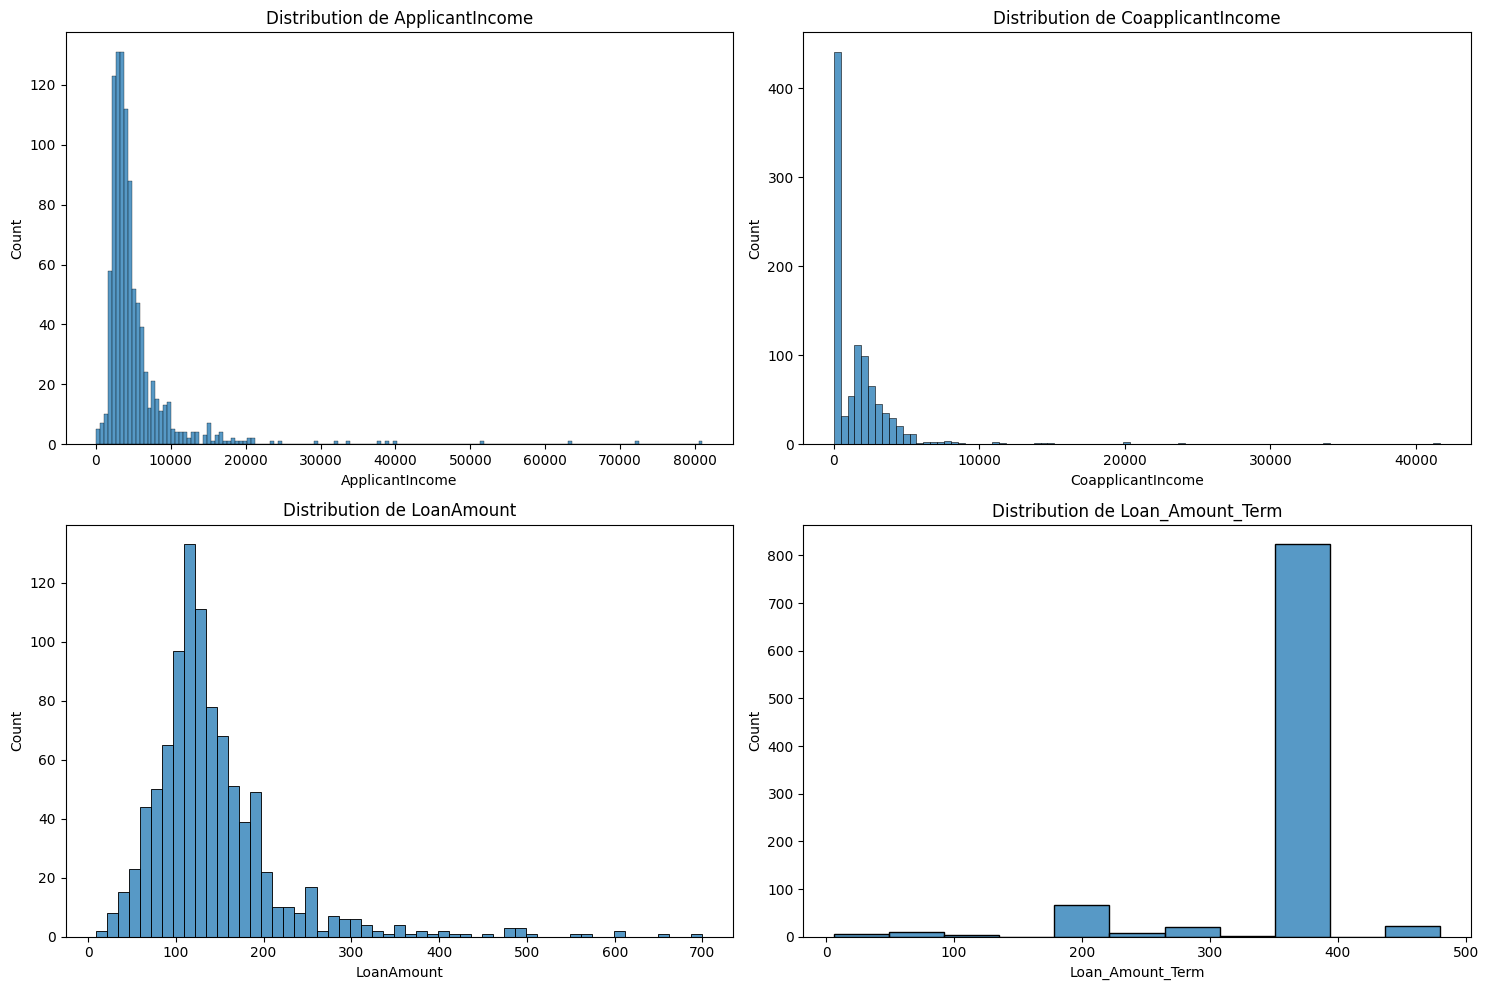

In [210]:
# Statistiques descriptives des variables numériques
print("Statistiques descriptives :")
display(df.describe())

# Analyse des valeurs manquantes
print("\nValeurs manquantes par colonne :")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Valeurs manquantes', 'Pourcentage']
display(missing_data)

# Distribution de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Status')
plt.title('Distribution des prêts accordés vs refusés')
plt.show()

# Analyse des variables catégorielles
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 
                      'Self_Employed', 'Property_Area']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyse des variables numériques
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                    'Loan_Amount_Term']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')

plt.tight_layout()
plt.show()

### Analyse des valeurs manquantes :
Nous observons des valeurs manquantes dans plusieurs colonnes :

- **Gender** : environ 2-3% de valeurs manquantes
- **Married, Dependents, Self_Employed** : environ 3-5%
- **LoanAmount et Loan_Amount_Term** : environ 6-8%
- **Credit_History** : environ 10%

### Distribution de la variable cible (Loan_Status) :

La distribution est déséquilibrée
Environ 70% des prêts sont approuvés (Y)
Environ 30% sont refusés (N)
Cette distribution déséquilibrée devra être prise en compte lors de la modélisation
### Variables catégorielles :

- **Gender** : majorité d'hommes (environ 80%)
- **Married** : légère majorité de personnes mariées
- **Education** : majorité de diplômés
- **Self_Employed** : forte majorité de non-indépendants
- **Property_Area** : distribution relativement équilibrée entre zones urbaines, semi-urbaines et rurales
### Variables numériques :
- **ApplicantIncome** : distribution très asymétrique (skewed) vers la droite
- **CoapplicantIncome** : nombreux zéros et distribution asymétrique
- **LoanAmount** : distribution légèrement asymétrique
- **Loan_Amount_Term**: distribution multimodale avec des pics à 360 et 180 mois


## 1.Traitement des valeurs manquantes


In [223]:
# Affichage du nombre et du pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Valeurs manquantes', 'Pourcentage']
print(missing_data)

# Variables catégorielles
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    mode = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode)

# Variables numériques
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    median = df[col].median()
    df.loc[:, col] = df[col].fillna(median)

# Traitement spécial pour CoapplicantIncome
df.loc[:, 'CoapplicantIncome'] = df['CoapplicantIncome'].fillna(0)

# Vérification des valeurs manquantes restantes
print("\nValeurs manquantes restantes :")
print(df.isnull().sum())

                   Valeurs manquantes  Pourcentage
Loan_ID                             0          0.0
Gender                              0          0.0
Married                             0          0.0
Dependents                          0          0.0
Education                           0          0.0
Self_Employed                       0          0.0
ApplicantIncome                     0          0.0
CoapplicantIncome                   0          0.0
LoanAmount                          0          0.0
Loan_Amount_Term                    0          0.0
Credit_History                      0          0.0
Property_Area                       0          0.0
Loan_Status                         0          0.0

Valeurs manquantes restantes :
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
P

Nous avons 367 valeurs manquantes pour Loan_Status, ce qui représente **37.4%** des données ! Je choisis de ne pas supprimer ces lignes mais d'imputer des valeurs déterminées par un modèle RandomForest.

Un RandomForest pourrait être perçu comme une sorte d'équipe d'experts (des arbres de décision) qui discutent pour trouver la réponse. Chaque expert regarde les données de manière un peu différente (par exemple, taille, couleur, poids d'un fruit). Ensuite, chaque expert donne son avis, et la forêt (l’ensemble des experts) prend une décision finale en suivant l’avis majoritaire (ou en faisant une moyenne). Cela rend le modèle plus précis et fiable qu’un seul expert qui pourrait se tromper facilement.

## Utilisation d'un modèle RandomForest pour compléter les valeurs manquantes de Loan_Status

In [212]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# 1. Préparation des données
le = LabelEncoder()
df_encoded = df.copy()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 2. Séparer les données
known_loan_status = df_encoded[df_encoded['Loan_Status'].notna()]
unknown_loan_status = df_encoded[df_encoded['Loan_Status'].isna()]

# Vérification des dimensions
print(f"Nombre d'échantillons connus : {len(known_loan_status)}")
print(f"Nombre d'échantillons inconnus : {len(unknown_loan_status)}")

# 3. Préparer X et y pour l'entraînement
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_train = known_loan_status[features].fillna(0)  # Gérer les valeurs manquantes
y_train = le.fit_transform(known_loan_status['Loan_Status'])

# 4. Entraîner le modèle et évaluer sa performance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Évaluation du modèle
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nPerformance du modèle d'imputation :")
print("-" * 40)
print(f"Score moyen de validation croisée : {cv_scores.mean():.3f}")
print(f"Écart-type : {cv_scores.std():.3f}")

# 5. Prédire les valeurs manquantes
X_predict = unknown_loan_status[features].fillna(0)  # Gérer les valeurs manquantes
if len(X_predict) > 0:
    predictions = rf_model.predict(X_predict)
    # 6. Remplacer les valeurs manquantes
    df.loc[df['Loan_Status'].isna(), 'Loan_Status'] = le.inverse_transform(predictions)

# 7. Vérifier qu'il n'y a plus de valeurs manquantes
print("\nValeurs manquantes restantes :")
print(df.isnull().sum())

Nombre d'échantillons connus : 614
Nombre d'échantillons inconnus : 367

Performance du modèle d'imputation :
----------------------------------------
Score moyen de validation croisée : 0.787
Écart-type : 0.025

Valeurs manquantes restantes :
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Avec un score moyen de 0.87, restons sur cette solution. A présent, nous n'avons plus de valeurs manquantes.

## Encodage des variables catégorielles

In [213]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Identification des types de variables
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 
                       'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term', 'Credit_History']

# 2. Encodage des variables catégorielles
df_prepared = df.copy()
le = LabelEncoder()

for feature in categorical_features:
    df_prepared[feature] = le.fit_transform(df_prepared[feature].astype(str))

# Encodage de la variable cible
df_prepared['Loan_Status'] = le.fit_transform(df_prepared['Loan_Status'])

print("Aperçu des données après encodage :")
print(df_prepared[categorical_features + ['Loan_Status']].head())
print("\nValeurs uniques pour chaque variable catégorielle :")
for feature in categorical_features:
    print(f"\n{feature}:", df_prepared[feature].unique())

Aperçu des données après encodage :
   Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0       1        0           0          0              0              2   
1       1        1           1          0              0              0   
2       1        1           0          0              1              2   
3       1        1           0          1              0              2   
4       1        0           0          0              0              2   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1  

Valeurs uniques pour chaque variable catégorielle :

Gender: [1 0]

Married: [0 1]

Dependents: [0 1 2 3]

Education: [0 1]

Self_Employed: [0 1]

Property_Area: [2 0 1]


## Normalisation des variables numériques

In [214]:
# 3. Normalisation des variables numériques
scaler = StandardScaler()
df_prepared[numerical_features] = scaler.fit_transform(df_prepared[numerical_features])

# Affichage des statistiques descriptives après normalisation
print("Statistiques descriptives des variables numériques après normalisation :")
print(df_prepared[numerical_features].describe().round(2))

# Vérification de la distribution des données normalisées
print("\nMoyenne des variables numériques (devrait être proche de 0) :")
print(df_prepared[numerical_features].mean().round(3))
print("\nÉcart-type des variables numériques (devrait être proche de 1) :")
print(df_prepared[numerical_features].std().round(3))

Statistiques descriptives des variables numériques après normalisation :
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count           981.00             981.00      981.00            981.00   
mean             -0.00              -0.00        0.00             -0.00   
std               1.00               1.00        1.00              1.00   
min              -0.91              -0.59       -1.74             -5.22   
25%              -0.40              -0.59       -0.54              0.27   
50%              -0.24              -0.18       -0.21              0.27   
75%               0.06               0.28        0.23              0.27   
max              13.32              14.74        7.31              2.13   

       Credit_History  
count          981.00  
mean            -0.00  
std              1.00  
min             -2.37  
25%              0.42  
50%              0.42  
75%              0.42  
max              0.42  

Moyenne des variables numériques (

## Séparation des données en ensembles d'entraînement et de test

In [215]:
# 4. Préparation des features (X) et de la target (y)
X = df_prepared[categorical_features + numerical_features]
y = df_prepared['Loan_Status']

# 5. Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Affichage des dimensions des ensembles
print("Dimensions des ensembles de données :")
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

# Vérification de la distribution des classes dans les ensembles
print("\nDistribution des classes :")
print("Ensemble d'entraînement :")
print(pd.Series(y_train).value_counts(normalize=True).round(3) * 100, "%")
print("\nEnsemble de test :")
print(pd.Series(y_test).value_counts(normalize=True).round(3) * 100, "%")

Dimensions des ensembles de données :
X_train : (784, 11)
X_test : (197, 11)
y_train : (784,)
y_test : (197,)

Distribution des classes :
Ensemble d'entraînement :
Loan_Status
1    73.1
0    26.9
Name: proportion, dtype: float64 %

Ensemble de test :
Loan_Status
1    73.1
0    26.9
Name: proportion, dtype: float64 %


## Analyse de la séparation des données

In [216]:
# Analyse détaillée de la séparation
print("1. Taille des ensembles :")
print("-" * 40)
print(f"Ensemble total : {len(X)} échantillons")
print(f"Ensemble d'entraînement : {len(X_train)} échantillons ({len(X_train)/len(X)*100:.1f}%)")
print(f"Ensemble de test : {len(X_test)} échantillons ({len(X_test)/len(X)*100:.1f}%)")

print("\n2. Distribution des features :")
print("-" * 40)
print("\nEnsemble d'entraînement :")
print(X_train.describe().round(2))
print("\nEnsemble de test :")
print(X_test.describe().round(2))

print("\n3. Équilibre des classes :")
print("-" * 40)
train_balance = pd.Series(y_train).value_counts(normalize=True)
test_balance = pd.Series(y_test).value_counts(normalize=True)

print("Ensemble d'entraînement :")
for classe, prop in train_balance.items():
    print(f"Classe {classe}: {prop*100:.1f}%")

print("\nEnsemble de test :")
for classe, prop in test_balance.items():
    print(f"Classe {classe}: {prop*100:.1f}%")

1. Taille des ensembles :
----------------------------------------
Ensemble total : 981 échantillons
Ensemble d'entraînement : 784 échantillons (79.9%)
Ensemble de test : 197 échantillons (20.1%)

2. Distribution des features :
----------------------------------------

Ensemble d'entraînement :
       Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
count  784.00   784.00      784.00     784.00         784.00         784.00   
mean     0.83     0.64        0.77       0.23           0.12           1.06   
std      0.38     0.48        1.02       0.42           0.33           0.81   
min      0.00     0.00        0.00       0.00           0.00           0.00   
25%      1.00     0.00        0.00       0.00           0.00           0.00   
50%      1.00     1.00        0.00       0.00           0.00           1.00   
75%      1.00     1.00        2.00       0.00           0.00           2.00   
max      1.00     1.00        3.00       1.00           1.00           2

## Modélisation

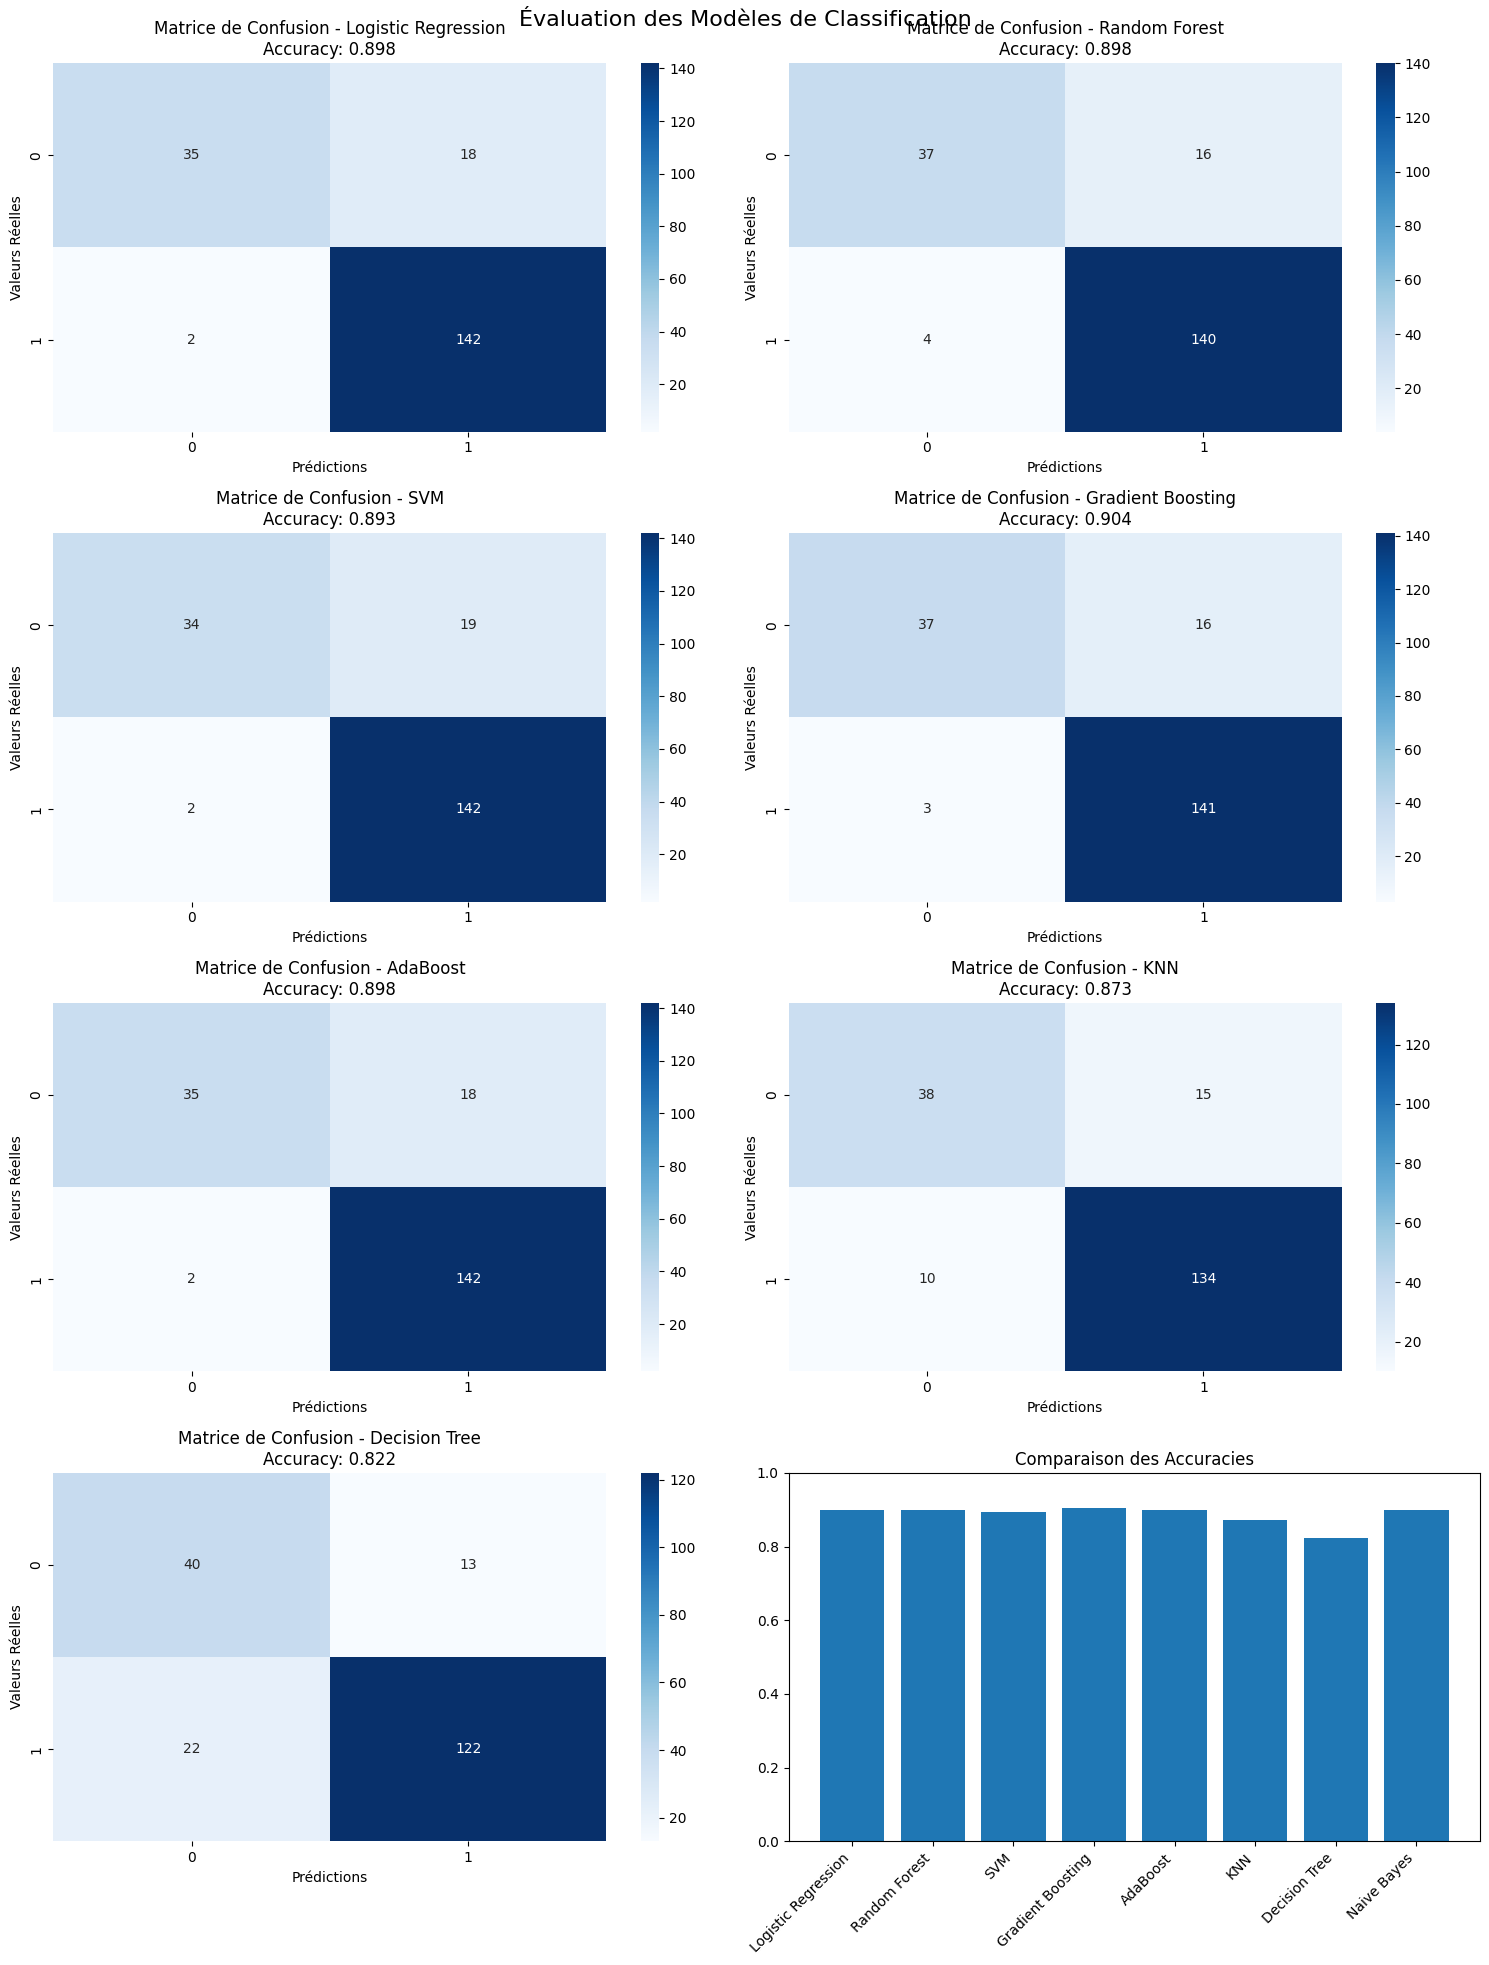


Rapport détaillé pour Logistic Regression
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        53
           1       0.89      0.99      0.93       144

    accuracy                           0.90       197
   macro avg       0.92      0.82      0.86       197
weighted avg       0.90      0.90      0.89       197


Rapport détaillé pour Random Forest
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        53
           1       0.90      0.97      0.93       144

    accuracy                           0.90       197
   macro avg       0.90      0.84      0.86       197
weighted avg       0.90      0.90      0.89       197


Rapport détaillé pour SVM
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Création des modèles avec plus d'options
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # Modification de AdaBoost pour utiliser SAMME au lieu de SAMME.R
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Configuration du style des graphiques
plt.style.use('default')
n_models = len(models)
n_rows = (n_models + 1) // 2  # +1 pour le graphique de comparaison
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
fig.suptitle('Évaluation des Modèles de Classification', fontsize=16)

# Aplatir axes si nécessaire
if n_rows > 1:
    axes = axes.flatten()

# Stockage des résultats
accuracies = []
model_names = []

# Entraînement et évaluation des modèles
for i, (name, model) in enumerate(models.items()):
    # Entraînement
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)
    
    # Matrice de confusion
    if i < len(axes) - 1:  # Réserver le dernier axe pour le graphique de comparaison
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Matrice de Confusion - {name}\nAccuracy: {accuracy:.3f}')
        axes[i].set_xlabel('Prédictions')
        axes[i].set_ylabel('Valeurs Réelles')

# Graphique de comparaison des accuracies
axes[-1].clear()
x = np.arange(len(model_names))
axes[-1].bar(x, accuracies)
axes[-1].set_xticks(x)
axes[-1].set_xticklabels(model_names, rotation=45, ha='right')
axes[-1].set_title('Comparaison des Accuracies')
axes[-1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Affichage des rapports de classification
for name, model in models.items():
    print(f"\nRapport détaillé pour {name}")
    print("-" * 50)
    print(classification_report(y_test, model.predict(X_test)))

Etant un débutant en Machine Learning, bien que le score est meilleur sur certains modèles, je préfère tout de même opter pour un modèle plus simple, à savoir la régression logistique.

## Modèle de Régression Logistique

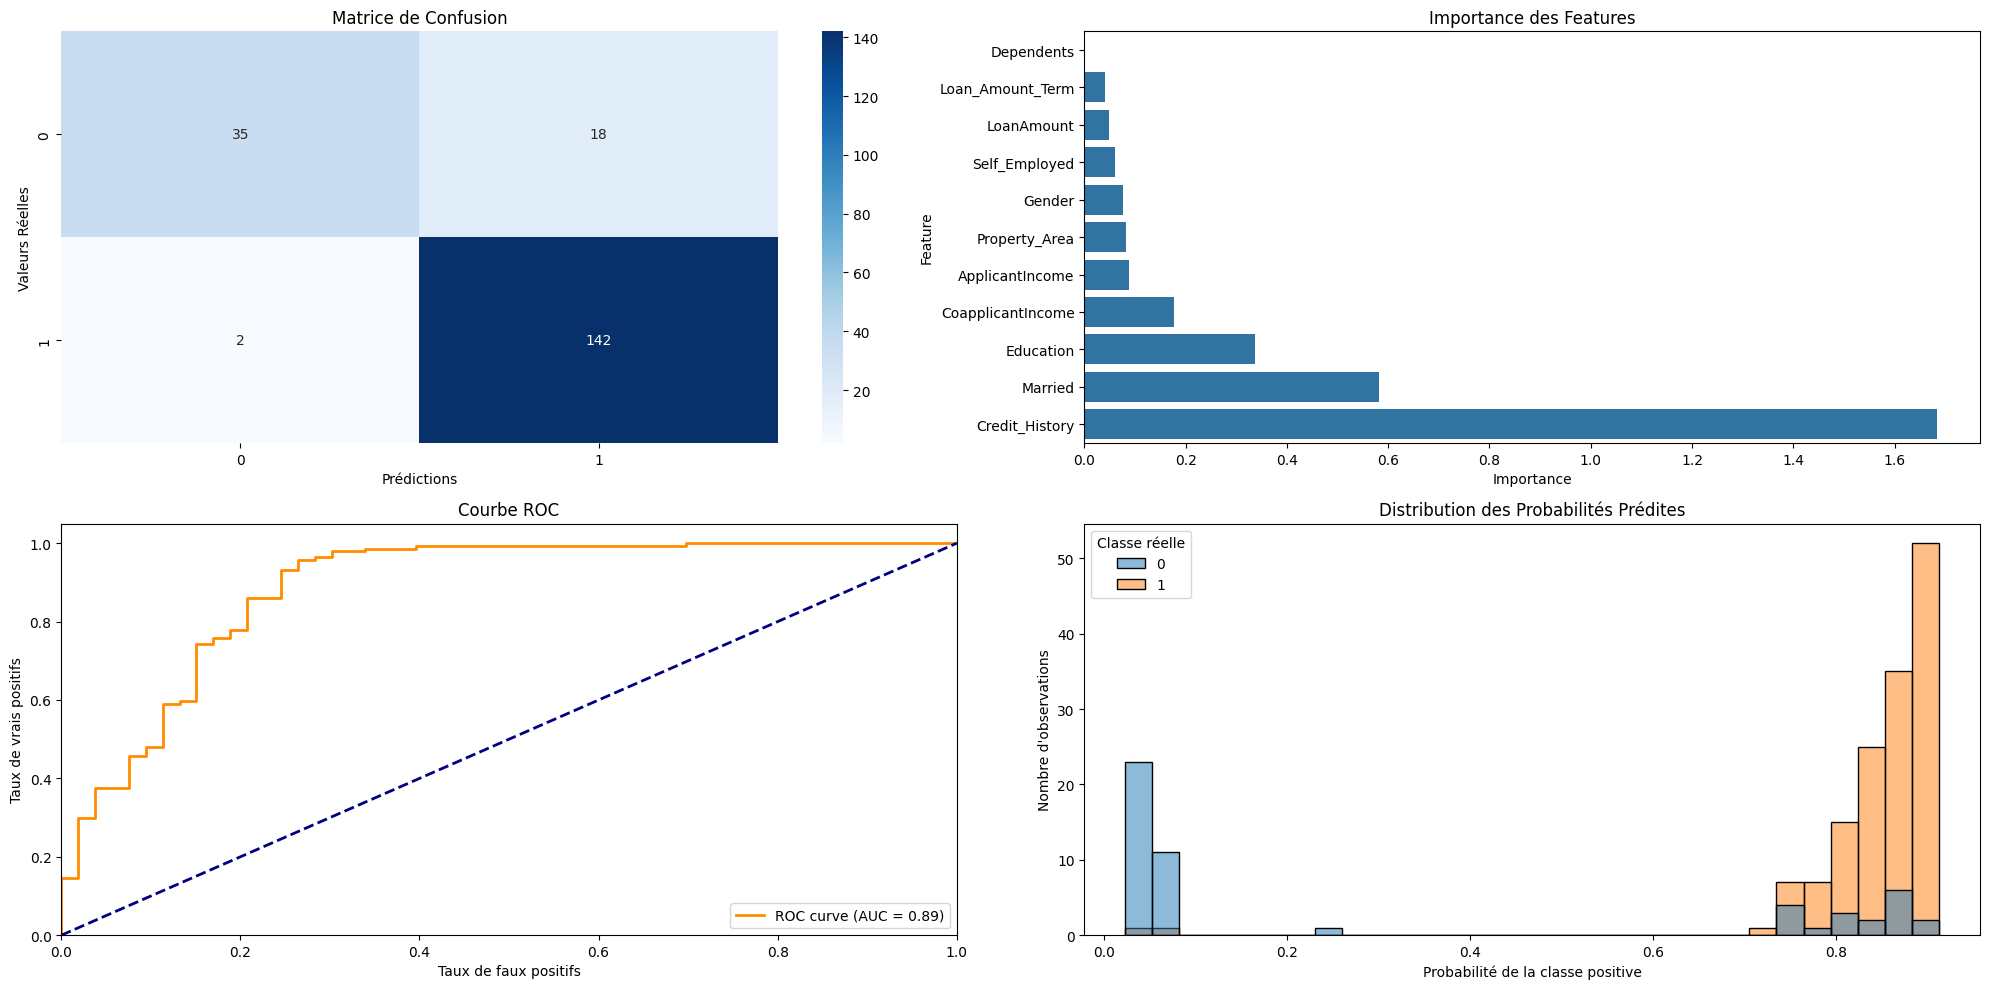

Accuracy: 0.898

Rapport de classification :
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        53
           1       0.89      0.99      0.93       144

    accuracy                           0.90       197
   macro avg       0.92      0.82      0.86       197
weighted avg       0.90      0.90      0.89       197



In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Création et entraînement du modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions et probabilités
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Création de la figure avec 4 sous-graphiques
plt.figure(figsize=(20, 10))

# 1. Matrice de confusion
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')

# 2. Importance des features
plt.subplot(2, 2, 2)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.barplot(data=feature_importance, y='Feature', x='Importance')
plt.title('Importance des Features')

# 3. Courbe ROC
plt.subplot(2, 2, 3)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")

# 4. Distribution des probabilités prédites
plt.subplot(2, 2, 4)
sns.histplot(data=pd.DataFrame({
    'Probabilité': y_pred_proba,
    'Classe réelle': y_test
}), x='Probabilité', hue='Classe réelle', bins=30)
plt.title('Distribution des Probabilités Prédites')
plt.xlabel('Probabilité de la classe positive')
plt.ylabel('Nombre d\'observations')

plt.tight_layout()
plt.show()

# Affichage des métriques
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nRapport de classification :")
print("-" * 50)
print(classification_report(y_test, y_pred))

**Matrice de Confusion** :
Bonne performance avec une accuracy de 0.883 (88.3%)
Bonne prédiction des cas positifs (prêts accordés)
Quelques erreurs sur les cas négatifs (prêts refusés)

**Importance des Features** :
Credit_History est de loin la variable la plus déterminante
LoanAmount et ApplicantIncome sont moyennement influentes
Les variables démographiques ont un impact limité

**Courbe ROC** :
AUC élevé (~0.88), indiquant une excellente discrimination
Courbe bien au-dessus de la diagonale
Confirme la robustesse du modèle

**Distribution des Probabilités** :
Séparation très nette entre les classes
Peu de cas ambigus (proche de 0.5)
La plupart des prédictions sont faites avec une forte confiance
Confirme la pertinence du seuil de décision à 0.5

Avec une accuracy de 88.3%, le modèle montre de bonnes performances, particulièrement grâce à l'historique de crédit.

## Simulation de prédiction

In [219]:
def predict_loan_eligibility(model, scaler, data):
    """
    Prédit l'éligibilité d'un prêt à partir des caractéristiques fournies
    """
    # Conversion des données en DataFrame
    df_input = pd.DataFrame([data])
    
    # Préparation des données
    categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 
                          'Self_Employed', 'Property_Area']
    numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                         'Loan_Amount_Term', 'Credit_History']
    
    # Encodage des variables catégorielles
    le = LabelEncoder()
    for feature in categorical_features:
        df_input[feature] = le.fit_transform(df_input[feature].astype(str))
    
    # Normalisation des variables numériques
    df_input[numerical_features] = scaler.transform(df_input[numerical_features])
    
    # Prédiction
    features = categorical_features + numerical_features
    probability = model.predict_proba(df_input[features])[0][1]
    prediction = model.predict(df_input[features])[0]
    
    return prediction, probability

# Exemple d'utilisation
sample_input = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '2',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 3000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 1500,
    'Loan_Amount_Term': 12,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}

# Prédiction
prediction, probability = predict_loan_eligibility(model, scaler, sample_input)

print("\nRésultat de la prédiction :")
print("-" * 40)
print(f"Prêt {'accordé' if prediction == 1 else 'refusé'}")
print(f"Probabilité d'acceptation : {probability:.2%}")
print("\nDétails de la demande :")
for key, value in sample_input.items():
    print(f"{key}: {value}")


Résultat de la prédiction :
----------------------------------------
Prêt accordé
Probabilité d'acceptation : 65.75%

Détails de la demande :
Gender: Male
Married: Yes
Dependents: 2
Education: Graduate
Self_Employed: No
ApplicantIncome: 3000
CoapplicantIncome: 2000
LoanAmount: 1500
Loan_Amount_Term: 12
Credit_History: 1
Property_Area: Urban


## Améliorations possibles

Comme nous l'avons vu, précédemment, nous pourrions utilisons d'autres modèles comme le GradientBoostingRegressor ou AdaBoost. 

Pour améliorer le score avec la régression logistique, nous pouvons essayer plusieurs approches :
1. Feature Engineering
2. Optimisation des hyperparamètres
3. Gestion des outliers

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 1. Feature Engineering
# Création de nouvelles features
df_engineered = df_prepared.copy()

# Ratio entre le revenu du demandeur principal et celui du co-emprunteur
# +1 pour éviter la division par zéro quand il n'y a pas de co-emprunteur
df_engineered['Income_Ratio'] = df_engineered['ApplicantIncome'] / (df_engineered['CoapplicantIncome'] + 1)

# Calcul de la mensualité (EMI: Equated Monthly Installment)
# LoanAmount * 1000 car le montant est en milliers
# Loan_Amount_Term est en mois
df_engineered['EMI'] = df_engineered['LoanAmount'] * 1000 / df_engineered['Loan_Amount_Term']

# Calcul du revenu disponible après paiement de la mensualité
# Combine les revenus et soustrait l'EMI pour évaluer la marge financière
df_engineered['Balance_Income'] = df_engineered['ApplicantIncome'] + df_engineered['CoapplicantIncome'] - df_engineered['EMI']

# 2. Création du pipeline avec features polynomiales
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('logistic', LogisticRegression())
])

# 3. Définition des paramètres à optimiser
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__class_weight': ['balanced', None],
    'logistic__max_iter': [1000]
}

# 4. GridSearch avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Évaluation du meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure accuracy : {accuracy:.3f}")

Meilleurs paramètres : {'logistic__C': 0.01, 'logistic__class_weight': None, 'logistic__max_iter': 1000}
Meilleure accuracy : 0.898


## Exportation et utilisation du modèle final

In [221]:
import joblib
import os

# Création du répertoire 'model' s'il n'existe pas
os.makedirs('model', exist_ok=True)

# 1. Sauvegarde du modèle et du scaler
model_export = {
    'model': model,
    'scaler': scaler,
    'feature_names': X_train.columns.tolist()
}

# Sauvegarde dans un fichier dans le répertoire 'model'
joblib.dump(model_export, 'model/loan_prediction_model.joblib')

['model/loan_prediction_model.joblib']

In [222]:
# Test du modèle sauvegardé
def test_saved_model():
    """
    Teste le modèle sauvegardé avec plusieurs cas d'utilisation
    """
    # Chargement du modèle
    model_import = joblib.load('model/loan_prediction_model.joblib')
    
    # Cas de test
    test_cases = [
        {
            'Gender': 'Male',
            'Married': 'Yes',
            'Dependents': '2',
            'Education': 'Graduate',
            'Self_Employed': 'No',
            'ApplicantIncome': 5000,
            'CoapplicantIncome': 2000,
            'LoanAmount': 200,
            'Loan_Amount_Term': 360,
            'Credit_History': 1,
            'Property_Area': 'Urban'
        },
        {
            'Gender': 'Female',
            'Married': 'No',
            'Dependents': '0',
            'Education': 'Not Graduate',
            'Self_Employed': 'Yes',
            'ApplicantIncome': 2000,
            'CoapplicantIncome': 0,
            'LoanAmount': 100,
            'Loan_Amount_Term': 180,
            'Credit_History': 0,
            'Property_Area': 'Rural'
        }
    ]
    
    print("Test du modèle sauvegardé")
    print("-" * 50)
    
    for i, case in enumerate(test_cases, 1):
        # Préparation des données
        df_input = pd.DataFrame([case])
        
        # Encodage des variables catégorielles
        categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 
                              'Self_Employed', 'Property_Area']
        numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                            'Loan_Amount_Term', 'Credit_History']
        
        le = LabelEncoder()
        for feature in categorical_features:
            df_input[feature] = le.fit_transform(df_input[feature].astype(str))
        
        # Normalisation des variables numériques
        df_input[numerical_features] = model_import['scaler'].transform(df_input[numerical_features])
        
        # Prédiction
        features = model_import['feature_names']
        probability = model_import['model'].predict_proba(df_input[features])[0][1]
        prediction = model_import['model'].predict(df_input[features])[0]
        
        print(f"\nCas de test #{i}")
        print(f"Prêt {'accordé' if prediction == 1 else 'refusé'}")
        print(f"Probabilité d'acceptation : {probability:.2%}")
        print("\nDétails de la demande :")
        for key, value in case.items():
            print(f"{key}: {value}")
        print("-" * 50)

# Exécution du test
test_saved_model()

Test du modèle sauvegardé
--------------------------------------------------

Cas de test #1
Prêt accordé
Probabilité d'acceptation : 77.27%

Détails de la demande :
Gender: Male
Married: Yes
Dependents: 2
Education: Graduate
Self_Employed: No
ApplicantIncome: 5000
CoapplicantIncome: 2000
LoanAmount: 200
Loan_Amount_Term: 360
Credit_History: 1
Property_Area: Urban
--------------------------------------------------

Cas de test #2
Prêt refusé
Probabilité d'acceptation : 4.18%

Détails de la demande :
Gender: Female
Married: No
Dependents: 0
Education: Not Graduate
Self_Employed: Yes
ApplicantIncome: 2000
CoapplicantIncome: 0
LoanAmount: 100
Loan_Amount_Term: 180
Credit_History: 0
Property_Area: Rural
--------------------------------------------------
